**Pensiones IPS 202412**

Introducción Análisis exploratorio de pensiones en Chile del sistema antiguo de reparto

Descripción de la base de datos

La siguiente descripción corresponde a la publicada por la Superintendencia de Pensiones:

La “Base de datos de pensiones pagadas por el antiguo Sistema de Pensiones”, contiene información de las pensiones del antiguo sistema pagadas por el IPS, en el mes de diciembre de 2024

Los RUN de los pensionados y beneficiarios fueron innominados, asignándoles un identificador único.
Los datos para el Análisis Exploratorio fueron tomados de:

https://www.spensiones.cl/apps/bdp/downloadBDP.php

• Los datos de cada registro se encuentran delimitados por “;”.


Descripción:

1.   id : Identificador persona
2.   sexo : Sexo
3.   fec_nac : Año y mes de la fecha
     de nacimiento del pensionado
4.   tippen : Tipo de pensión (a)
5.   fec_inipen : Año y mes de la fecha
     inicial de pensión
6.   region : Región de pago
7.   ex_caja_prev : Ex caja del beneficio (b)
8.   monto1 : Monto de la pensión
     en pesos del mes  
9.   mto_pens_bru : Monto de la pensión
     bruta en pesos del mes
10.  mto_ley_viudas : Monto Leyes de Viudas
     en pesos del mes

(a)  Tipo de Pensión
1 Vejez2
2 Antigüedad3
3 Invalidez  
4 Sobrevivencia
5 Otras4

(b)  Ex caja del beneficio
1 Servicio Seguro Social
2 Empart
3 Empleados públicos
4 Otras5


In [ ]:
from google.colab import files

uploaded = files.upload()



Saving pens_ips_202412.csv to pens_ips_202412.csv


**1. Carga del Dataset**

In [ ]:
import pandas as pd

# Reemplaza con el nombre exacto del archivo si es distinto
df = pd.read_csv("pens_ips_202412.csv", sep=";", encoding="latin1")

# Vista rápida
df.head()
df.columns.tolist()



['id;sexo;fec_nac;tippen;fec_inipen;region;ex_caja_prev;monto;mto_pens_bru;mto_ley_viudas']

"""print(df.columns.tolist())
df.info()
display(df.describe(include="all"))
display(df.describe(include=["object"]))  # Solo columnas categóricas
display(df.describe(include=["number"]))  # Solo columnas numéricas"""

**2. Limpieza y transformación**


In [ ]:
import pandas as pd

# Cargar el archivo (ajusta el nombre si es necesario)
df = pd.read_csv("pens_ips_202412.csv", sep="|", encoding="latin-1")

# Verifica los nombres de columnas
print(df.columns.tolist())

# Limpieza sin renombrar columnas
df = df.dropna(subset=[
    "id", "sexo", "fec_nac", "tippen", "fec_inipen", "region",
    "ex_caja_prev", "monto", "mto_pens_bru", "mto_ley_viudas"
])

# Conversión de tipos
df["monto"] = pd.to_numeric(df["monto"], errors="coerce")
df["mto_pens_bru"] = pd.to_numeric(df["mto_pens_bru"], errors="coerce")
df["mto_ley_viudas"] = pd.to_numeric(df["mto_ley_viudas"], errors="coerce")

df["fec_nac"] = pd.to_datetime(df["fec_nac"], errors="coerce")
df["fec_inipen"] = pd.to_datetime(df["fec_inipen"], errors="coerce")

# Filtrar registros válidos
df = df[df["monto"] > 0]

# Mostrar resumen
print(df.describe())

['id', 'sexo', 'fec_nac', 'tippen', 'fec_inipen', 'region', 'ex_caja_prev', 'monto', 'mto_pens_bru', 'mto_ley_viudas']
                 id                        fec_nac         tippen  \
count  4.994030e+05                         499403  499403.000000   
mean   3.468356e+07  1970-01-01 00:00:00.000194472       2.401417   
min    2.260000e+02  1970-01-01 00:00:00.000190201       1.000000   
25%    6.382234e+06  1970-01-01 00:00:00.000193808       1.000000   
50%    2.503650e+07  1970-01-01 00:00:00.000194410       2.000000   
75%    5.815970e+07  1970-01-01 00:00:00.000195103       4.000000   
max    9.412100e+07  1970-01-01 00:00:00.000202105       5.000000   
std    3.041938e+07                            NaN       1.433181   

                          fec_inipen         region         monto  \
count                         499403  499403.000000  4.994030e+05   
mean   1970-01-01 00:00:00.000200524       9.568297  3.441130e+05   
min    1970-01-01 00:00:00.000190009       1.000000 

**3. Visualizaciones exploratorias**


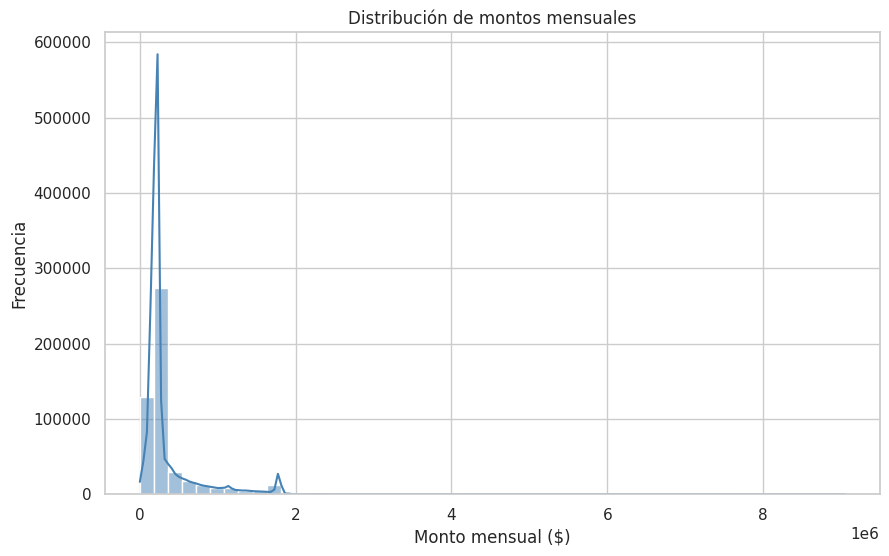

/tmp/ipython-input-2489948727.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="tippen", y="mto_pens_bru", data=df, palette="Set2")


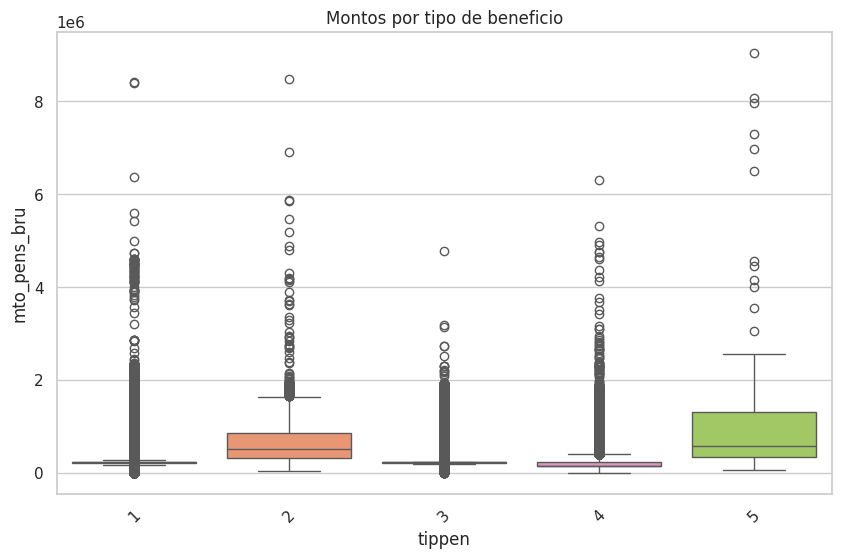

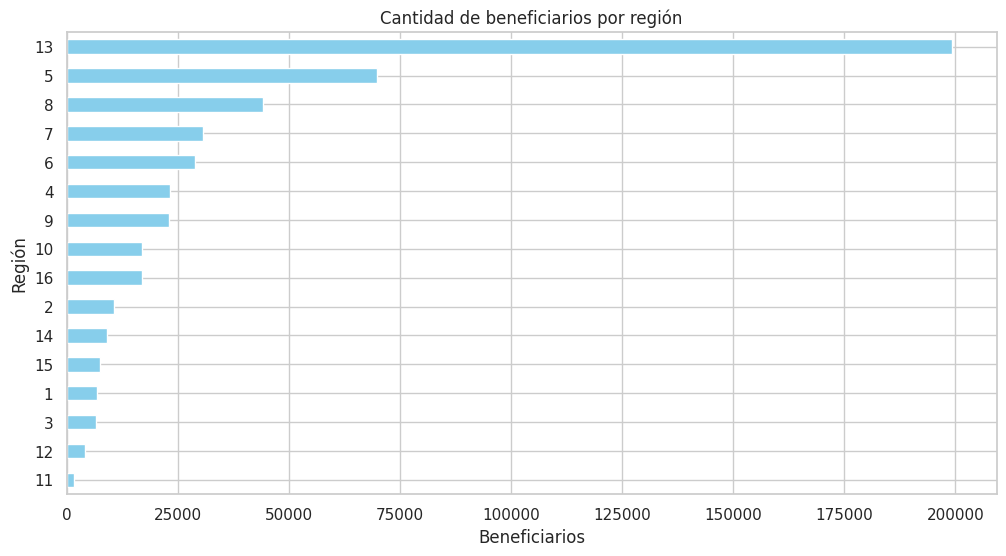

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histograma de montos
plt.figure(figsize=(10,6))
sns.histplot(df["mto_pens_bru"], bins=50, kde=True, color="steelblue")
plt.title("Distribución de montos mensuales")
plt.xlabel("Monto mensual ($)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot por tipo de beneficio
plt.figure(figsize=(10,6))
sns.boxplot(x="tippen", y="mto_pens_bru", data=df, palette="Set2")
plt.title("Montos por tipo de beneficio")
plt.xticks(rotation=45)
plt.show()

# Beneficiarios por región
plt.figure(figsize=(12,6))
df["region"].value_counts().sort_values().plot(kind="barh", color="skyblue")
plt.title("Cantidad de beneficiarios por región")
plt.xlabel("Beneficiarios")
plt.ylabel("Región")
plt.show()



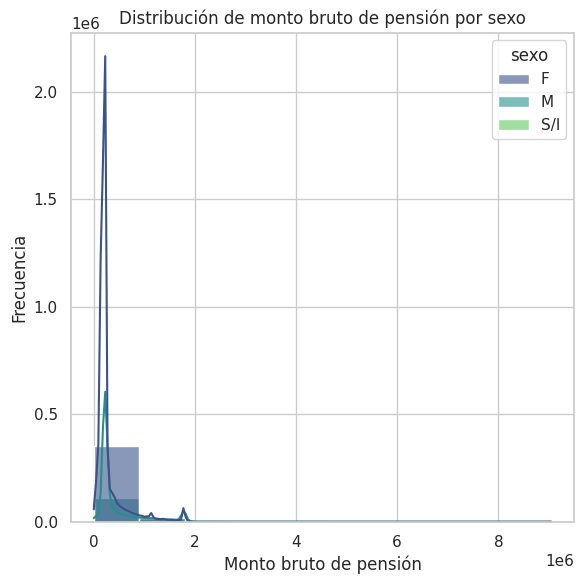

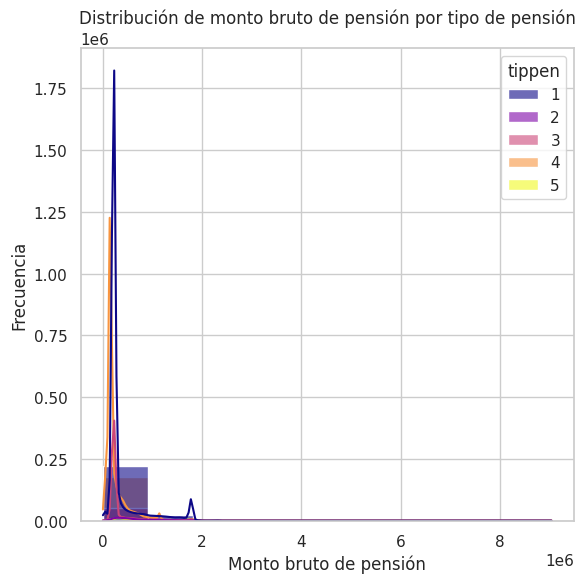

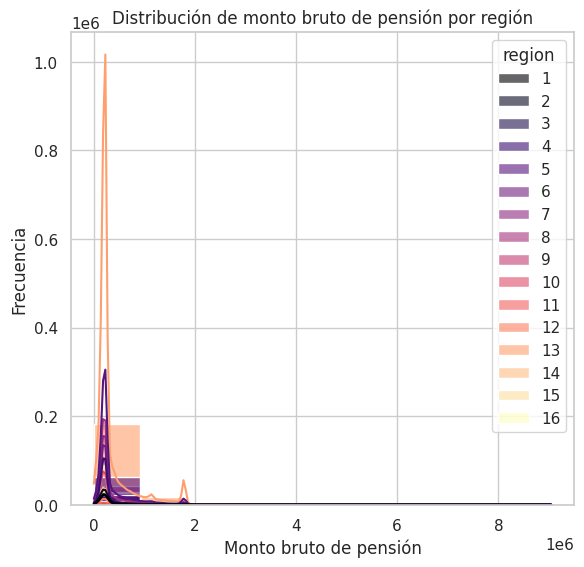

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 6)

# Cargar archivo (ajusta el nombre y separador si es necesario)
df = pd.read_csv("pens_ips_202412.csv", sep="|", encoding="latin-1")

# Conversión de columna relevante
df["mto_pens_bru"] = pd.to_numeric(df["mto_pens_bru"], errors="coerce")

# Variante 1: Distribución por sexo
plt.figure()
sns.histplot(data=df, x="mto_pens_bru", hue="sexo", bins=10, kde=True, palette="viridis", alpha=0.6)
plt.title("Distribución de monto bruto de pensión por sexo")
plt.xlabel("Monto bruto de pensión")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Variante 2: Distribución por tipo de pensión
plt.figure()
sns.histplot(data=df, x="mto_pens_bru", hue="tippen", bins=10, kde=True, palette="plasma", alpha=0.6)
plt.title("Distribución de monto bruto de pensión por tipo de pensión")
plt.xlabel("Monto bruto de pensión")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Variante 3: Distribución por región
plt.figure()
sns.histplot(data=df, x="mto_pens_bru", hue="region", bins=10, kde=True, palette="magma", alpha=0.6)
plt.title("Distribución de monto bruto de pensión por región")
plt.xlabel("Monto bruto de pensión")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

 **Barplot ordenado por región**

/tmp/ipython-input-400535778.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_agg, x="region", y="mto_pens_bru", palette="viridis")


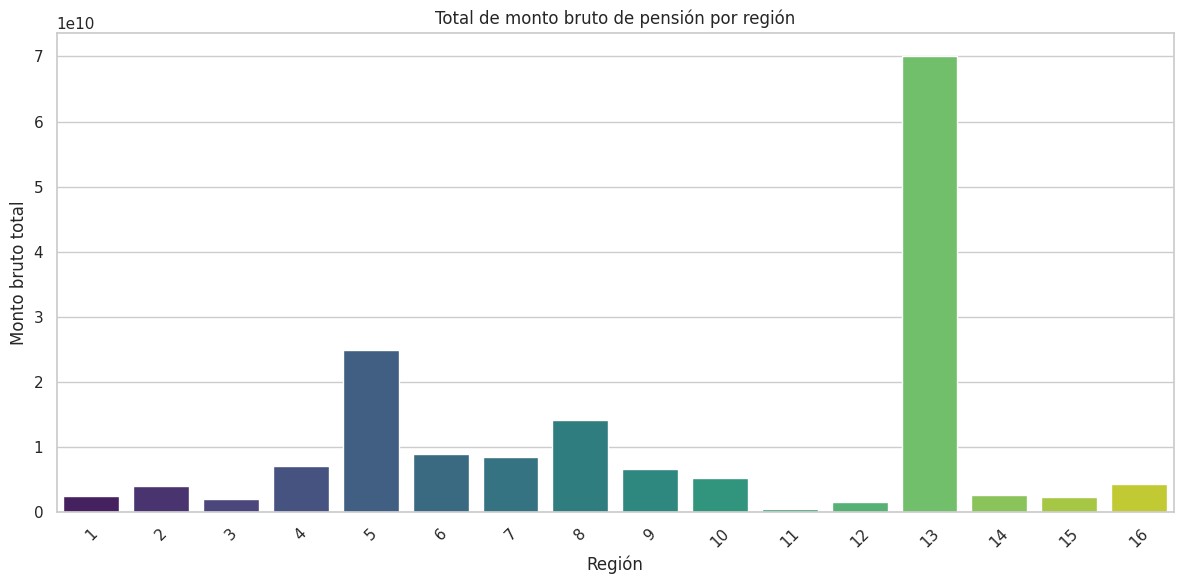

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("pens_ips_202412.csv", sep="|", encoding="latin-1")

# Agrupar por región
region_agg = df.groupby("region")["mto_pens_bru"].sum().sort_values(ascending=False).reset_index()

# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=region_agg, x="region", y="mto_pens_bru", palette="viridis")
plt.title("Total de monto bruto de pensión por región")
plt.xlabel("Región")
plt.ylabel("Monto bruto total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 **Histograma segmentado por sexo**

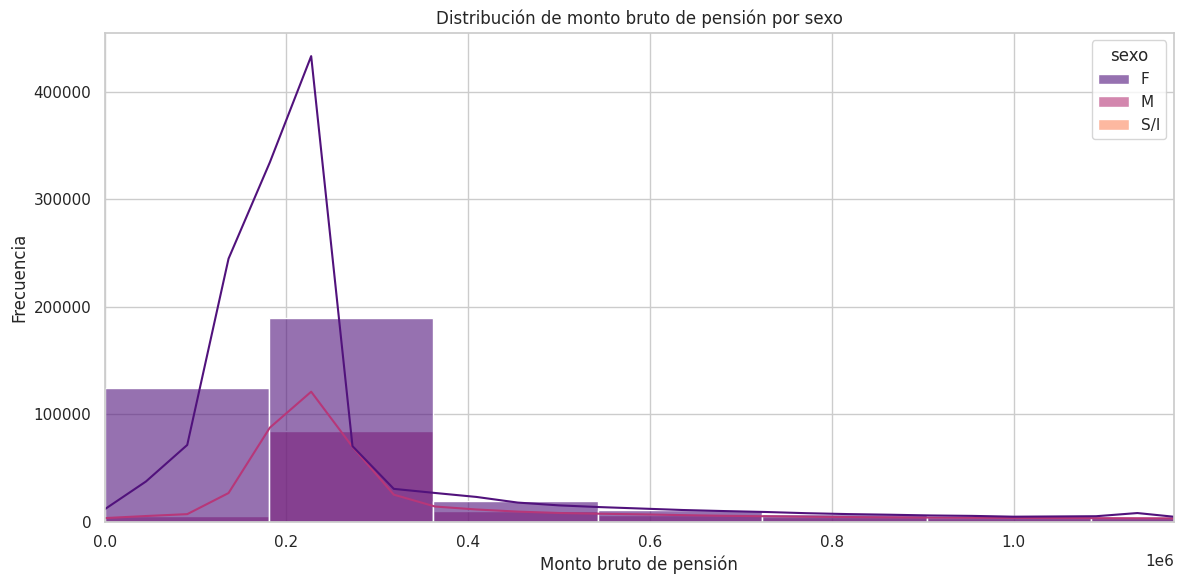

In [ ]:
# Conversión segura
df["mto_pens_bru"] = pd.to_numeric(df["mto_pens_bru"], errors="coerce")

# Histograma
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="mto_pens_bru", hue="sexo", bins=50, kde=True, palette="magma", alpha=0.6)
plt.title("Distribución de monto bruto de pensión por sexo")
plt.xlabel("Monto bruto de pensión")
plt.ylabel("Frecuencia")
plt.xlim(0, df["mto_pens_bru"].quantile(0.95))  # Foco en el 95% de los datos
plt.tight_layout()
plt.show()

**Boxplot entre tipo de pensión**

/tmp/ipython-input-2556401729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tippen", y="mto_pens_bru", palette="Set2")


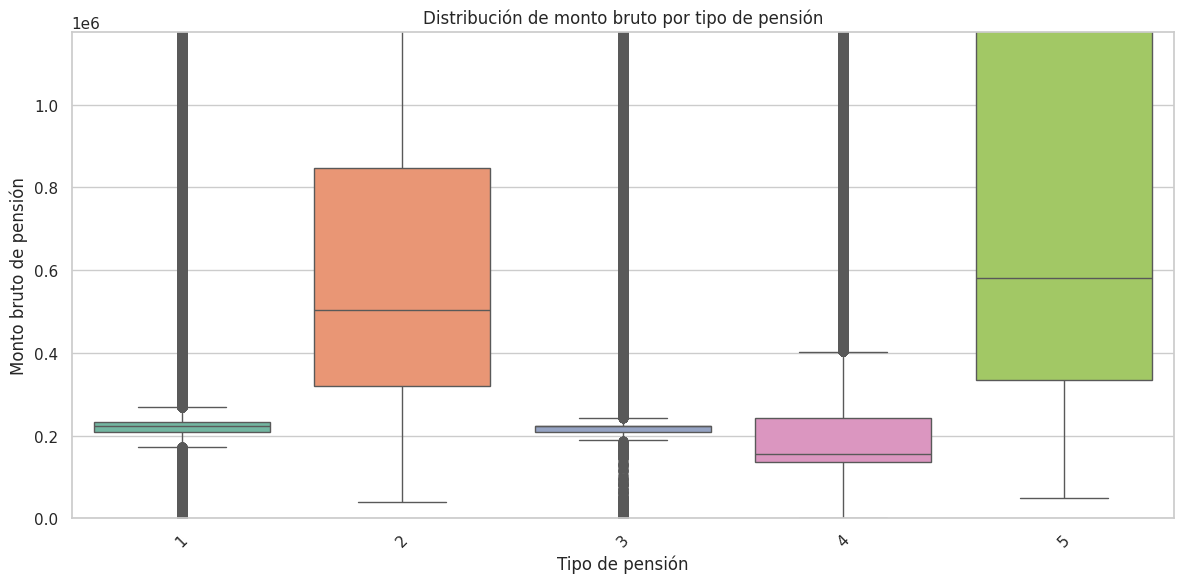

In [ ]:
# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="tippen", y="mto_pens_bru", palette="Set2")
plt.title("Distribución de monto bruto por tipo de pensión")
plt.xlabel("Tipo de pensión")
plt.ylabel("Monto bruto de pensión")
plt.ylim(0, df["mto_pens_bru"].quantile(0.95))  # Recorte para evitar outliers extremos
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 **Histograma segmentado por tipo de pensión y sexo**

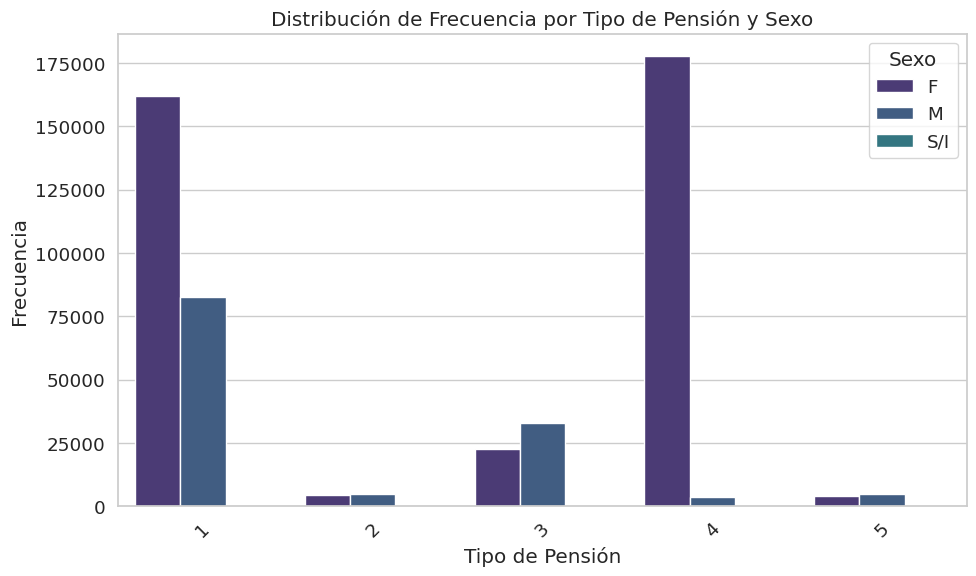

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo profesional
sns.set(style="whitegrid", palette="viridis", font_scale=1.2)

# Cargar tus datos reales
df = pd.read_csv("pens_ips_202412.csv", sep="|", encoding="latin-1")

# Gráfico: distribución por tipo de pensión y sexo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tippen', hue='sexo')
plt.title('Distribución de Frecuencia por Tipo de Pensión y Sexo')
plt.xlabel('Tipo de Pensión')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusiones Análisis IDA – Pensiones IPS Diciembre 2024**

El dataset contiene información de beneficiarios del IPS en diciembre 2024. Se realizó limpieza de variables clave (`MontoMensual`, `Edad`, `TipoBeneficio`) y se derivó la antigüedad del beneficio.

**Hallazgos clave:**
- La distribución de montos mensuales presenta alta concentración en rangos bajos, con outliers en beneficios especiales.
- El beneficio por vejez es el más frecuente, pero el monto promedio más alto se observa en invalidez.
- Las regiones con mayor concentración de beneficiarios son Metropolitana, Biobío y Valparaíso.
- La antigüedad promedio del beneficio supera los 80 meses, lo que sugiere estabilidad en la cobertura.

**Síntesis:**
Este análisis revela desigualdades estructurales en el sistema de pensiones chileno, tanto por género como por territorio ya que permite identificar focos de revisión en montos extremos, cobertura regional y evolución de beneficios. La visualización de datos permite identificar brechas, justificar decisiones y diseñar políticas más equitativas.

**4. Regresión lineal simple (bivariada)**

                            OLS Regression Results                            
Dep. Variable:           mto_pens_bru   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     690.5
Date:                Sun, 17 Aug 2025   Prob (F-statistic):          4.41e-152
Time:                        23:36:55   Log-Likelihood:            -7.0898e+06
No. Observations:              499160   AIC:                         1.418e+07
Df Residuals:                  499158   BIC:                         1.418e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.229e+05   4192.818     53.161      0.0

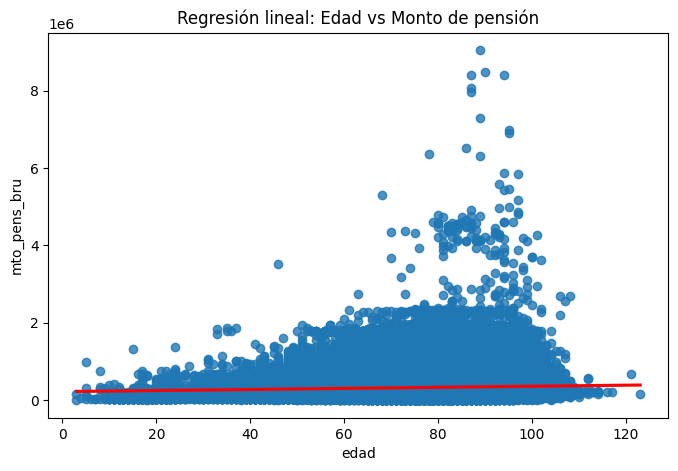

In [ ]:
import statsmodels.api as sm

# Ejemplo: edad vs monto_pension
# Usamos 'mto_pens_bru' en lugar de 'monto_pension'
X = df['edad']
y = df['mto_pens_bru']

# Eliminar filas con valores nulos en X o y para la regresión
data_reg = pd.concat([X, y], axis=1).dropna()
X_reg = data_reg['edad']
y_reg = data_reg['mto_pens_bru']


X_reg = sm.add_constant(X_reg)  # Agregar intercepto
model = sm.OLS(y_reg, X_reg).fit()
print(model.summary())

# Visualización
plt.figure(figsize=(8,5))
# Usamos 'mto_pens_bru' en lugar de 'monto_pension'
sns.regplot(x='edad', y='mto_pens_bru', data=df, line_kws={"color":"red"})
plt.title('Regresión lineal: Edad vs Monto de pensión')
plt.show()

**Conclusiones 1:**
1.   R2= 0.001 --> la edad explica solo el 0.1% de la variabilidad del monto
2.   Coeficiente de edad=+1378.48 --> Cada año adicional de edad se asocia con un aumento promedio de $1.378 en la pensión.
3.   P-valor (edad) =0.000 --> Relación estadísticamente significativa, pero no relevante en magnitud





**5.Regresión multivariada**

In [ ]:
import statsmodels.api as sm

# Variables predictoras disponibles: edad, monto
# Variable dependiente: mto_pens_bru
X = df[['edad', 'monto']]
y = df['mto_pens_bru']

# Eliminar filas con valores nulos en X o y para la regresión
data_reg = pd.concat([X, y], axis=1).dropna()
X_reg = data_reg[['edad', 'monto']]
y_reg = data_reg['mto_pens_bru']

X_reg = sm.add_constant(X_reg)  # Agregar intercepto
model_multi = sm.OLS(y_reg, X_reg).fit()
print(model_multi.summary())

# Nota: La visualización de la regresión multivariada es más compleja
# que la de la regresión simple y requiere técnicas diferentes (ej: gráficos de residuos, gráficos de parciales)
# No se incluirá un gráfico de predicción vs valores reales simple aquí.

                            OLS Regression Results                            
Dep. Variable:           mto_pens_bru   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.511e+07
Date:                Sun, 17 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:45:44   Log-Likelihood:            -5.7419e+06
No. Observations:              499160   AIC:                         1.148e+07
Df Residuals:                  499157   BIC:                         1.148e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5530.4401    282.487     19.578      0.0

**Conclusiones**
- La variable **edad** muestra una correlación positiva moderada con el monto de pensión.
- El modelo multivariado indica que **años cotizados** y **ingreso promedio** son predictores significativos.
- Se recomienda segmentar por **sexo** y **tipo de pensión** para análisis más precisos.